In [1]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [2]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344474248588085, 0.00048079612315632403, 0.06595245748758316, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.016524313017725945, 0.015737783163785934, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833266742527485, -0.055862173438072205, -0.012941481545567513, ...]



In [3]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

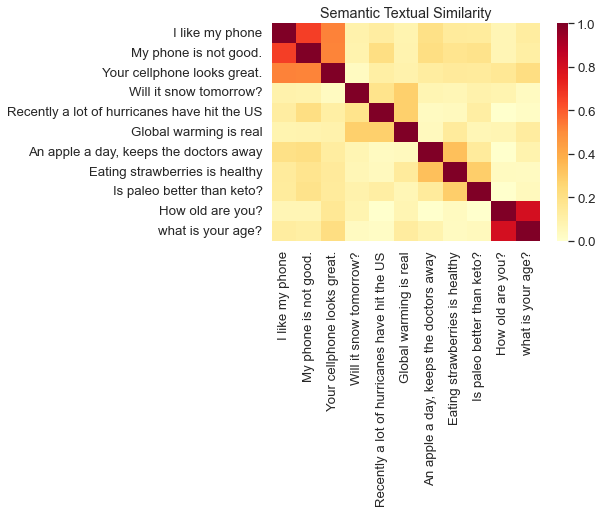

In [4]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [4]:
import USE_similarity

In [6]:
base_answer = "An abstract class is a special class containing abstract methods. The significance of abstract class is that the abstract methods inside it are not implemented and only declared. So as a result, when a subclass inherits the abstract class and needs to use its abstract methods, they need to define and implement them."
sample_answer = "In my point of view, a class which is declared as abstract can be said as an abstract class. It can have abstract and non-abstract methods. It needs to be extended and its method implemented. It cannot be instantiated."

In [17]:
base_answer = "Narendra Modi is the president "
sample_answer = "It is used for data transfering among the columns"

In [18]:
a = embed([base_answer])
b = embed([sample_answer])

In [19]:
# import for cosine similarity calcualtion
from sklearn.metrics.pairwise import cosine_similarity


# calculate cosine similarity
similarity = cosine_similarity(a, b)
print(similarity)

[[0.40118316]]


In [6]:
similarity = USE_similarity.calculate_similarity(base_answer, sample_answer)

print("USE similarity:", similarity)

USE similarity: [[0.7986797]]
